**IMPLENTATION OF NAIVE BAYES CALSSIFICATION**

Accuracy: 0.98

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



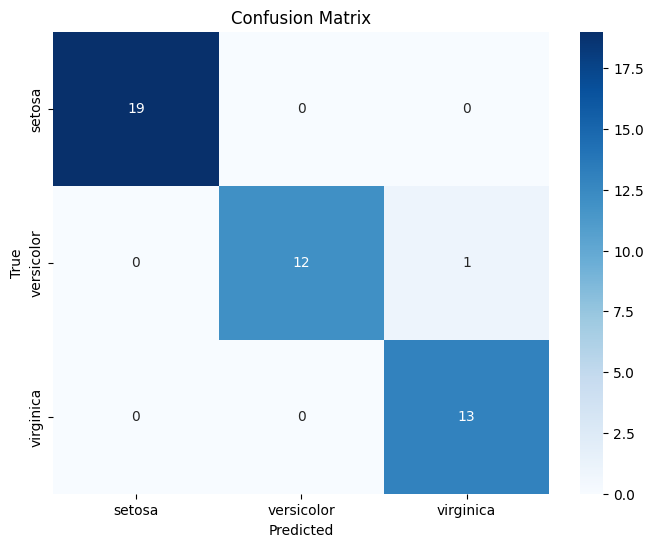

In [2]:
# Step 1: Install Required Libraries
!pip install numpy pandas scikit-learn matplotlib seaborn

# Step 2: Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load the Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

# Step 4: Data Preprocessing
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**EXAMPLE**

# **SPAM MAIL DETECTION**

Data shape: (5572, 5)
Preview of the data:
      v1                                                 v2    Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...           NaN   
1    ham                      Ok lar... Joking wif u oni...           NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...           NaN   
3    ham  U dun say so early hor... U c already then say...           NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...           NaN   
..   ...                                                ...           ...   
95  spam  Your free ringtone is waiting to be collected....   PO Box 5249   
96   ham                  Watching telugu movie..wat abt u?           NaN   
97   ham  i see. When we finish we have loads of loans t...           NaN   
98   ham  Hi. Wk been ok - on hols now! Yes on for a bit...           NaN   
99   ham  Please don't text me anymore. I have nothing e...           NaN   

               Unnamed: 3 Unname

<ipython-input-1-aeeb33633f53>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


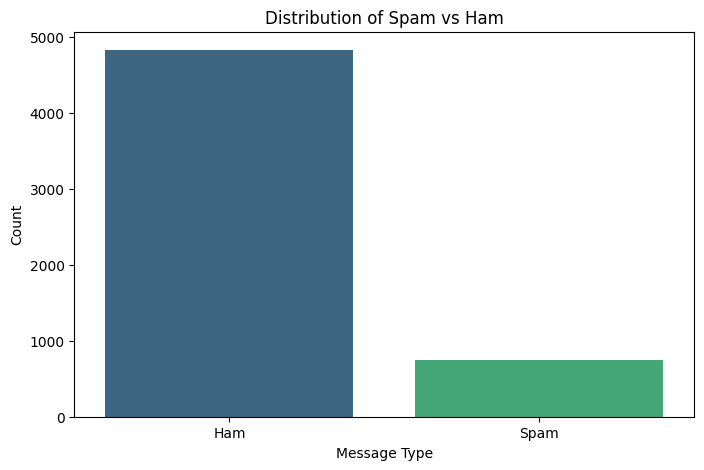

Accuracy: 0.9838565022421525
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
try:
    data = pd.read_csv('spam.csv', encoding='latin-1')
except Exception as e:
    print(f"Error loading the CSV file: {e}")
    exit()

# Check the shape of the DataFrame
print(f"Data shape: {data.shape}")

# Preview the first few rows
print("Preview of the data:")
print(data.head(100))  # Display first 20 rows

# Check for null values
print("Missing values in each column:")
print(data.isnull().sum())

# Check the columns of the DataFrame
print("Columns in the DataFrame:")
print(data.columns)

# Ensure the correct columns are present
if 'v1' in data.columns and 'v2' in data.columns:
    data = data[['v1', 'v2']]
    data.columns = ['label', 'message']
else:
    print("Expected columns 'v1' and 'v2' not found. Please check the CSV file structure.")
    exit()

# Encode labels: ham = 0, spam = 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check the data types
print("Data types in the DataFrame:")
print(data.dtypes)

# Visualize the distribution of spam vs ham
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data, hue='label', palette='viridis', legend=False)
plt.title('Distribution of Spam vs Ham')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Convert text to feature vectors
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train the classifier
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Make predictions
y_pred = model.predict(X_test_counts)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
